In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
df = pd.read_csv("loan.csv",low_memory= False)

In [3]:
df_loan = df.copy()
df_loan.head(7)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [5]:
df_loan.drop(df_loan.columns.difference(['loan_amnt','term','int_rate','installment','grade','emp_length','home_ownership','annual_inc','verification_status','loan_status','purpose']),axis = 1, inplace=True)

In [6]:
df_loan.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length             44825
home_ownership             0
annual_inc                 4
verification_status        0
loan_status                0
purpose                    0
dtype: int64

In [7]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            887379 non-null  float64
 1   term                 887379 non-null  object 
 2   int_rate             887379 non-null  float64
 3   installment          887379 non-null  float64
 4   grade                887379 non-null  object 
 5   emp_length           842554 non-null  object 
 6   home_ownership       887379 non-null  object 
 7   annual_inc           887375 non-null  float64
 8   verification_status  887379 non-null  object 
 9   loan_status          887379 non-null  object 
 10  purpose              887379 non-null  object 
dtypes: float64(4), object(7)
memory usage: 74.5+ MB


In [8]:
df_loan.head(10)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose
0,5000.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card
1,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,car
2,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business
3,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,other
4,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Current,other
5,5000.0,36 months,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding
6,7000.0,60 months,15.96,170.08,C,8 years,RENT,47004.0,Not Verified,Current,debt_consolidation
7,3000.0,36 months,18.64,109.43,E,9 years,RENT,48000.0,Source Verified,Fully Paid,car
8,5600.0,60 months,21.28,152.39,F,4 years,OWN,40000.0,Source Verified,Charged Off,small_business
9,5375.0,60 months,12.69,121.45,B,< 1 year,RENT,15000.0,Verified,Charged Off,other


In [9]:
label_categories = [
    (0, ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Current']),
    (1, ['Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period', 
         'Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off'])
]

# function to apply the transformation
def classify_label(text):
    for category, matches in label_categories:
        if any(match in text for match in matches):
            return category
    return text

df_loan.loc[:, 'label'] = df_loan['loan_status'].apply(classify_label)
df_loan = df_loan.drop('loan_status', axis=1)

In [10]:
# label several label with specific grading system.
def SC_LabelEncoder1(text):
    if text == "E":
        return 5
    elif text == "D":
        return 4
    elif text == "C":
        return 3
    elif text == "B":
        return 2
    elif text == "A":
        return 1
    else:
        return 6
    
    
def SC_LabelEncoder2(text):
    if text == "< 1 year":
        return 12
    elif text == "1 year":
        return 11
    elif text == "2 years":
        return 10
    elif text == "3 years":
        return 9
    elif text == "4 years":
        return 8
    elif text == "5 years":
        return 7
    elif text == "6 years":
        return 6
    elif text == "7 years":
        return 5
    elif text == "8 years":
        return 4
    elif text == "9 years":
        return 3
    elif text == "10 years":
        return 2
    elif text == "10+ years":
        return 1
    else:
        return text

def SC_LabelEncoder3(text):
    if text == "RENT":
        return 3
    elif text == "MORTGAGE":
        return 2
    elif text == "OWN":
        return 1
    else:
        return text
    
df_loan["grade"] = df_loan["grade"].apply(SC_LabelEncoder1)
df_loan["emp_length"] = df_loan["emp_length"].apply(SC_LabelEncoder2)
df_loan["home_ownership"] = df_loan["home_ownership"].apply(SC_LabelEncoder3)

In [11]:
df_loan.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length             44825
home_ownership             0
annual_inc                 4
verification_status        0
purpose                    0
label                      0
dtype: int64

In [12]:
# printing loans not in 0 and 1
df_loan[~df_loan.label.isin([0, 1])]['label'].value_counts()

label
Issued    8460
Name: count, dtype: int64

In [13]:
df_loan[df_loan['emp_length'].isnull()]

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,label
168,2500.0,36 months,7.51,77.78,1,NaN,1,12000.0,Source Verified,debt_consolidation,1
323,18000.0,60 months,17.58,452.98,4,NaN,2,60000.0,Verified,debt_consolidation,0
394,4000.0,36 months,11.71,132.31,2,NaN,3,24000.0,Source Verified,home_improvement,0
422,1000.0,36 months,14.65,34.50,3,NaN,3,18408.0,Not Verified,major_purchase,1
439,8250.0,36 months,7.51,256.67,1,NaN,2,31500.0,Verified,debt_consolidation,0
...,...,...,...,...,...,...,...,...,...,...,...
887321,20000.0,60 months,8.67,411.98,2,NaN,2,62000.0,Verified,credit_card,0
887337,19600.0,60 months,14.31,459.22,3,NaN,1,49000.0,Verified,credit_card,1
887355,26950.0,36 months,8.19,846.88,1,NaN,3,54000.0,Verified,debt_consolidation,0
887359,25000.0,60 months,15.59,602.52,4,NaN,1,55000.0,Not Verified,debt_consolidation,0


In [14]:
df_loan["home_ownership"].value_counts()

home_ownership
2        443557
3        356117
1         87470
OTHER       182
NONE         50
ANY           3
Name: count, dtype: int64

In [15]:
df_loan.drop(df_loan[df_loan.home_ownership.isin(['OTHER','NONE','ANY'])].index,inplace=True)

In [16]:
df_loan.annual_inc=df_loan.annual_inc.fillna(df_loan.annual_inc.median())

In [17]:
df_loan.emp_length=df_loan.emp_length.fillna(df_loan.emp_length.median())

In [18]:
df_loan['term'] = df_loan['term'].map({' 36 months': 0, ' 60 months': 1})

In [19]:
verification_mapping={
    'Not Verified':0,
    'Source Verified':1,
    'Verified':2
}
df_loan['verification_status']=df_loan['verification_status'].map(verification_mapping)
    


In [20]:
# Convert 'label' column to numeric, forcing errors to NaN
df_loan['label'] = pd.to_numeric(df_loan['label'], errors='coerce')

# Now calculate the mean for each 'purpose' group
mean_target = df_loan.groupby('purpose')['label'].mean()


In [21]:
mean_target

purpose
car                   0.067775
credit_card           0.057552
debt_consolidation    0.080080
educational           0.208134
home_improvement      0.069192
house                 0.113444
major_purchase        0.075739
medical               0.095216
moving                0.113081
other                 0.098098
renewable_energy      0.126761
small_business        0.173349
vacation              0.085916
wedding               0.123188
Name: label, dtype: float64

In [22]:
df_loan['purpose'] = df_loan['purpose'].map(mean_target)

In [23]:
df_loan.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,label
0,5000.0,0,10.65,162.87,2,1.0,3,24000.0,2,0.057552,0.0
1,2500.0,1,15.27,59.83,3,12.0,3,30000.0,1,0.067775,1.0
2,2400.0,0,15.96,84.33,3,1.0,3,12252.0,0,0.173349,0.0
3,10000.0,0,13.49,339.31,3,1.0,3,49200.0,1,0.098098,0.0
4,3000.0,1,12.69,67.79,2,11.0,3,80000.0,1,0.098098,0.0


In [24]:
df_loan.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
purpose                   0
label                  8460
dtype: int64

In [25]:
df_loan[(df_loan['label'] != 0) & (df_loan['label'] != 1)]['label'].sum()


0.0

In [26]:
feat_arr_num = ["dti","earliest_cr_line","delinq_2yrs","collections_12_mths_ex_med",
"inq_last_6mths","total_rev_hi_lim","acc_now_delinq","tot_coll_amt","tot_cur_bal",
"last_credit_pull_d","open_acc","total_acc","mths_since_last_delinq",
"mths_since_last_major_derog","mths_since_last_record","pub_rec","revol_bal","revol_util"]
df[feat_arr_num].isnull().sum()

dti                                 0
earliest_cr_line                   29
delinq_2yrs                        29
collections_12_mths_ex_med        145
inq_last_6mths                     29
total_rev_hi_lim                70276
acc_now_delinq                     29
tot_coll_amt                    70276
tot_cur_bal                     70276
last_credit_pull_d                 53
open_acc                           29
total_acc                          29
mths_since_last_delinq         454312
mths_since_last_major_derog    665676
mths_since_last_record         750326
pub_rec                            29
revol_bal                           0
revol_util                        502
dtype: int64

In [27]:
df_new = pd.merge(df_loan, df[['delinq_2yrs']], left_index=True, right_index=True)

In [28]:
df_new.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,label,delinq_2yrs
0,5000.0,0,10.65,162.87,2,1.0,3,24000.0,2,0.057552,0.0,0.0
1,2500.0,1,15.27,59.83,3,12.0,3,30000.0,1,0.067775,1.0,0.0
2,2400.0,0,15.96,84.33,3,1.0,3,12252.0,0,0.173349,0.0,0.0
3,10000.0,0,13.49,339.31,3,1.0,3,49200.0,1,0.098098,0.0,0.0
4,3000.0,1,12.69,67.79,2,11.0,3,80000.0,1,0.098098,0.0,0.0


In [29]:
df_new.shape

(887144, 12)

In [30]:
df_new.dropna(inplace=True)
df_new.shape

(878659, 12)

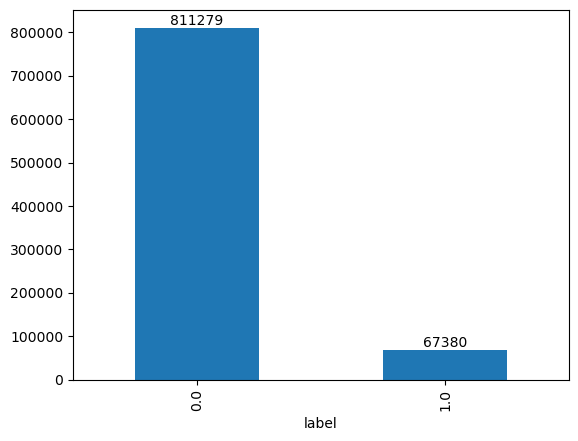

In [31]:
import matplotlib.pyplot as plt

# distribution of label
df_new['label'].value_counts().plot(kind='bar')

# Add counts on top of each bar
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()

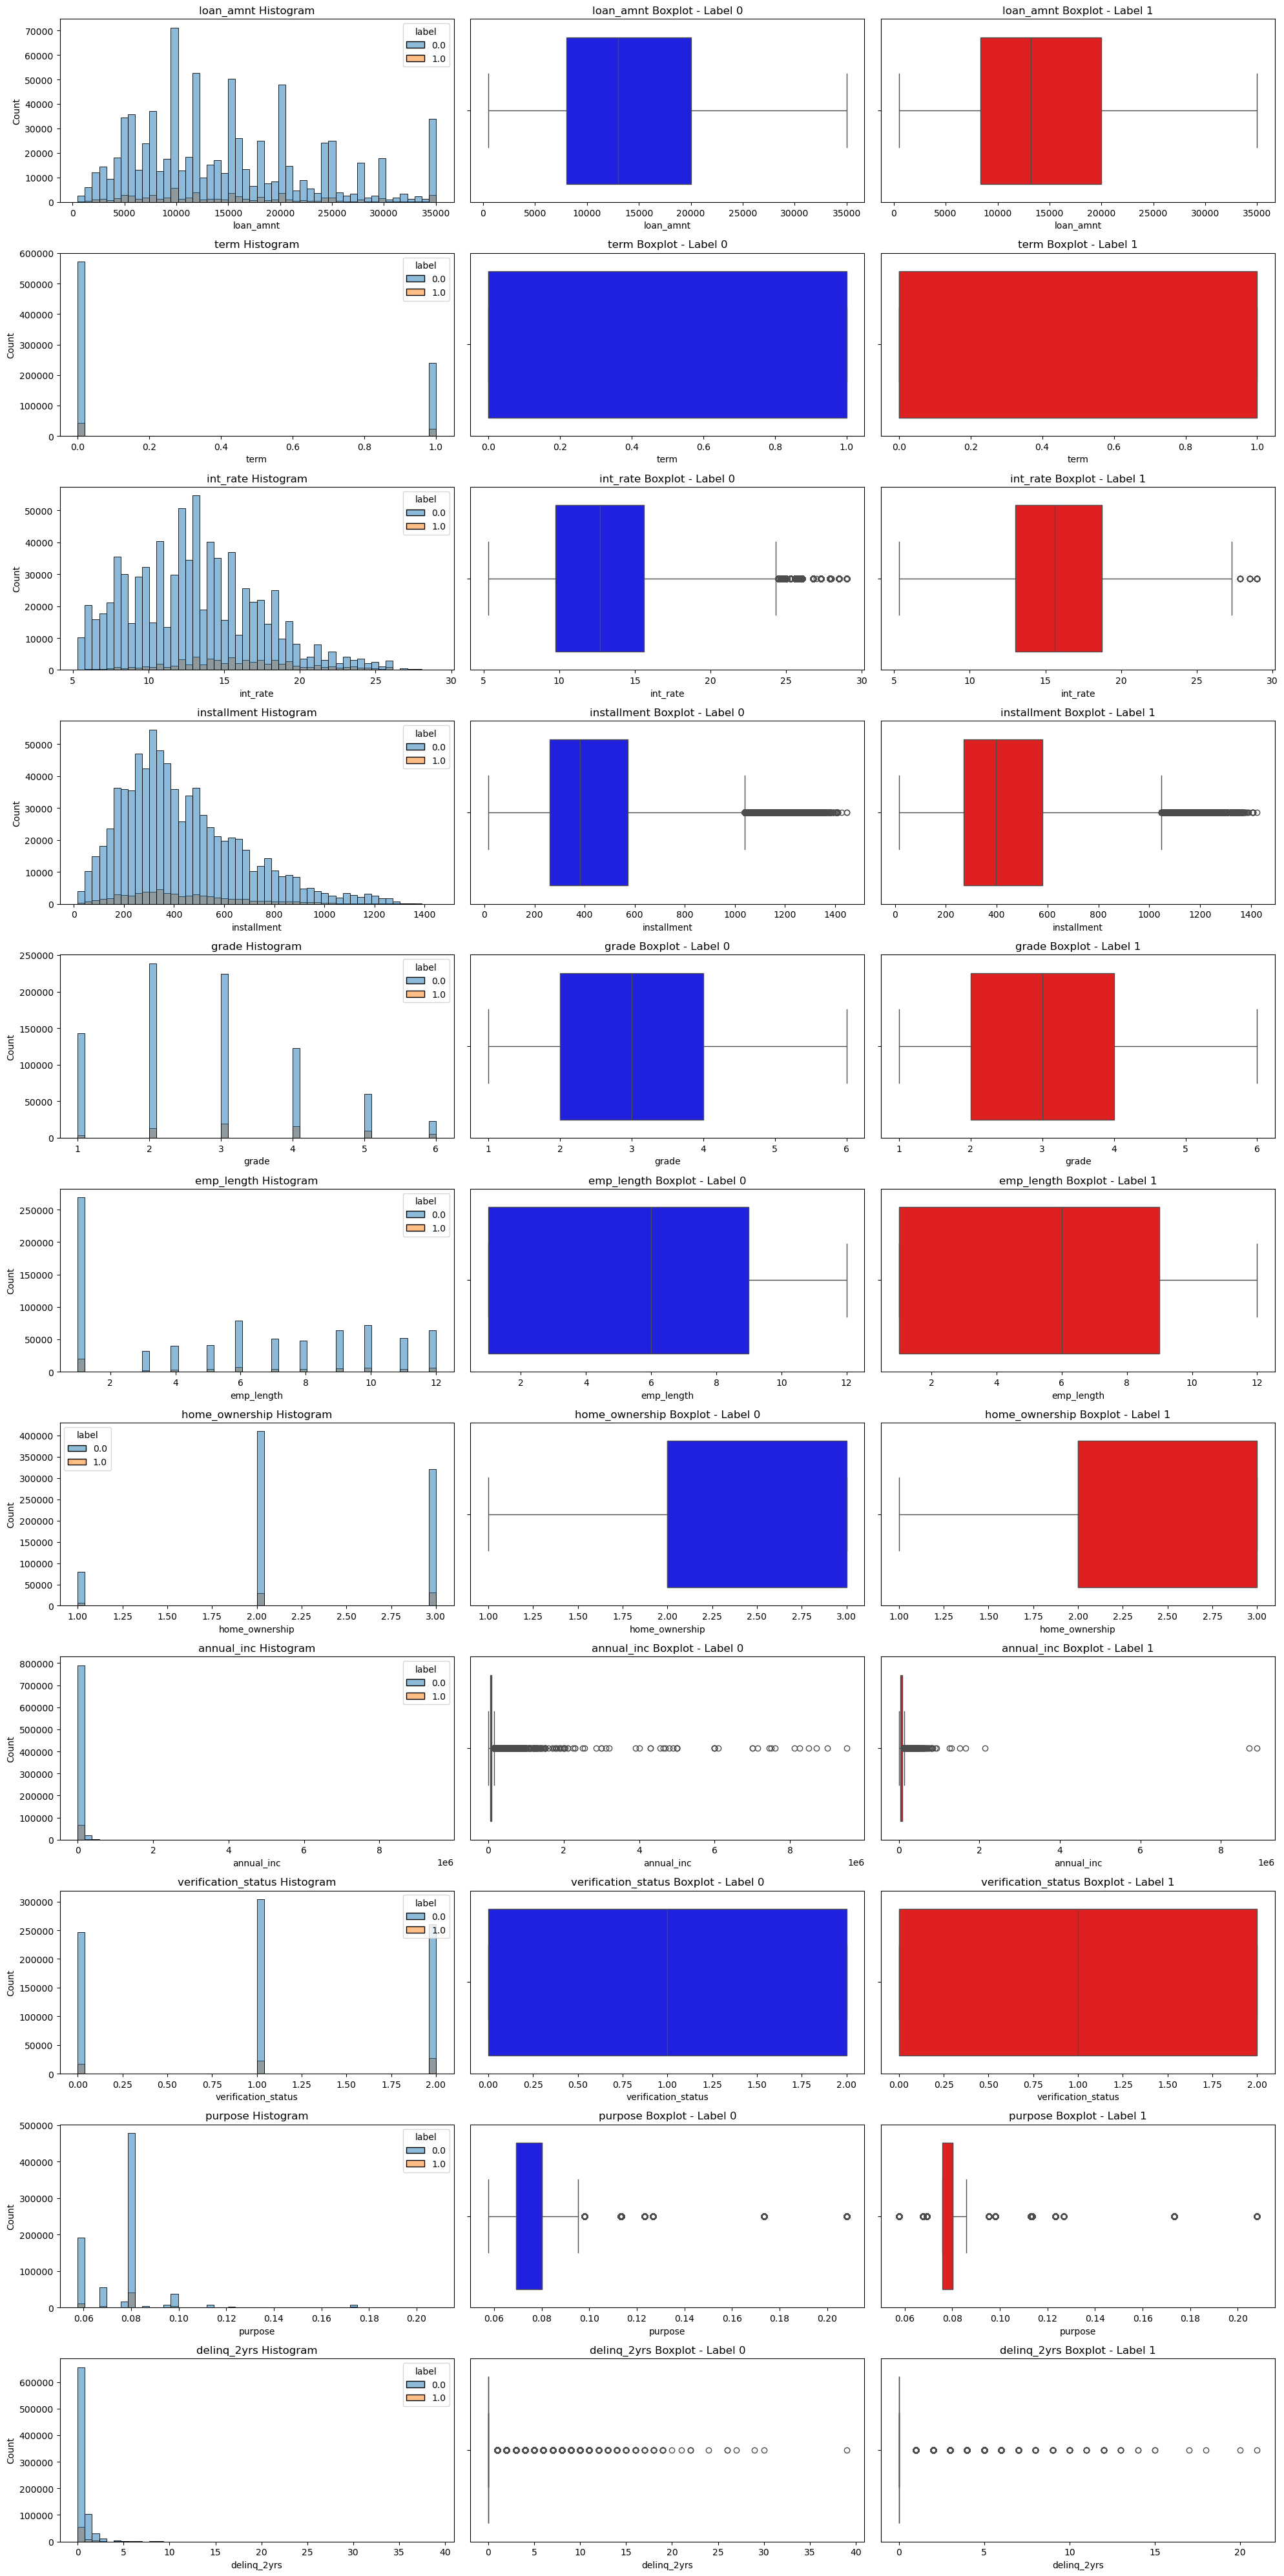

In [32]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# List of features to plot
features = ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 
            'emp_length', 'home_ownership', 'annual_inc', 
            'verification_status', 'purpose', 'delinq_2yrs']

# Set up the matplotlib figure
plt.figure(figsize=(20, 40))

for i, feature in enumerate(features, 1):
    # Histogram
    plt.subplot(len(features), 3, 3 * i - 2)
    sns.histplot(data=df_new, x=feature, hue='label', kde=False, bins=50)
    plt.title(f'{feature} Histogram')
    
    # Boxplot for Label 0
    plt.subplot(len(features), 3, 3 * i - 1)
    sns.boxplot(x=df_new[df_new['label'] == 0][feature], orient='h', color='blue')
    plt.title(f'{feature} Boxplot - Label 0')
    # plt.gca().set_xlim(df_new[feature].min(), df_new[feature].max())  # Match x-limits to histogram
    
    # Boxplot for Label 1
    plt.subplot(len(features), 3, 3 * i)
    sns.boxplot(x=df_new[df_new['label'] == 1][feature], orient='h', color='red')
    plt.title(f'{feature} Boxplot - Label 1')
    # plt.gca().set_xlim(df_new[feature].min(), df_new[feature].max())  # Match x-limits to histogram

plt.tight_layout()
plt.show()

In [33]:
df_new[df_new['label'] == 0]['delinq_2yrs'].value_counts()

delinq_2yrs
0.0     655782
1.0     103515
2.0      30541
3.0      10857
4.0       4858
5.0       2460
6.0       1344
7.0        697
8.0        426
9.0        258
10.0       171
11.0       113
12.0        76
13.0        57
14.0        43
15.0        25
16.0        17
18.0        10
17.0         9
19.0         8
22.0         3
26.0         2
29.0         1
24.0         1
21.0         1
30.0         1
20.0         1
27.0         1
39.0         1
Name: count, dtype: int64

## We can get rid of the people having more than 17 times past due payments from the class 0 since they can be wrong interpretation for the algorithm¶

In [35]:
df_new_2 = df_new.drop(df_new[(df_new['label'] == 0) & (df_new['delinq_2yrs'] > 17)].index)

In [36]:
df_new_2[df_new_2['label'] == 0]['delinq_2yrs'].value_counts()

delinq_2yrs
0.0     655782
1.0     103515
2.0      30541
3.0      10857
4.0       4858
5.0       2460
6.0       1344
7.0        697
8.0        426
9.0        258
10.0       171
11.0       113
12.0        76
13.0        57
14.0        43
15.0        25
16.0        17
17.0         9
Name: count, dtype: int64

## We can also see that the annual income column is showing large amount of the outliers we can get rid of values above 1.5 million usd

In [38]:
df_new_2[df_new_2['annual_inc']>1500000]['annual_inc'].shape

(66,)

In [39]:
df_new_2.shape

(878629, 12)

In [40]:
df_new_2.drop(df_new_2[df_new_2['annual_inc']>1500000].index, inplace = True)
df_new_2.shape

(878563, 12)

##We will now try to build the nural network to predict the credit risk of the customers based on their features we have chosen abovee

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_new_normalized = pd.DataFrame(scaler.fit_transform(df_new_2), columns=df_new_2.columns)

In [43]:
df_new_normalized['label'] = df_new_normalized['label'].astype('int')

In [44]:
df_new_normalized.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,label,delinq_2yrs
0,0.130435,0.0,0.225180,0.102952,0.2,0.000000,1.0,0.016000,1.0,0.000000,0,0.0
1,0.057971,1.0,0.420363,0.030886,0.4,1.000000,1.0,0.020000,0.5,0.067890,1,0.0
2,0.055072,0.0,0.449514,0.048021,0.4,0.000000,1.0,0.008168,0.0,0.768995,0,0.0
3,0.275362,0.0,0.345163,0.226355,0.4,0.000000,1.0,0.032800,0.5,0.269263,0,0.0
4,0.072464,1.0,0.311365,0.036453,0.2,0.909091,1.0,0.053333,0.5,0.269263,0,0.0


## Correlation Heatmap - we can see there are not more than two features correlating with each others

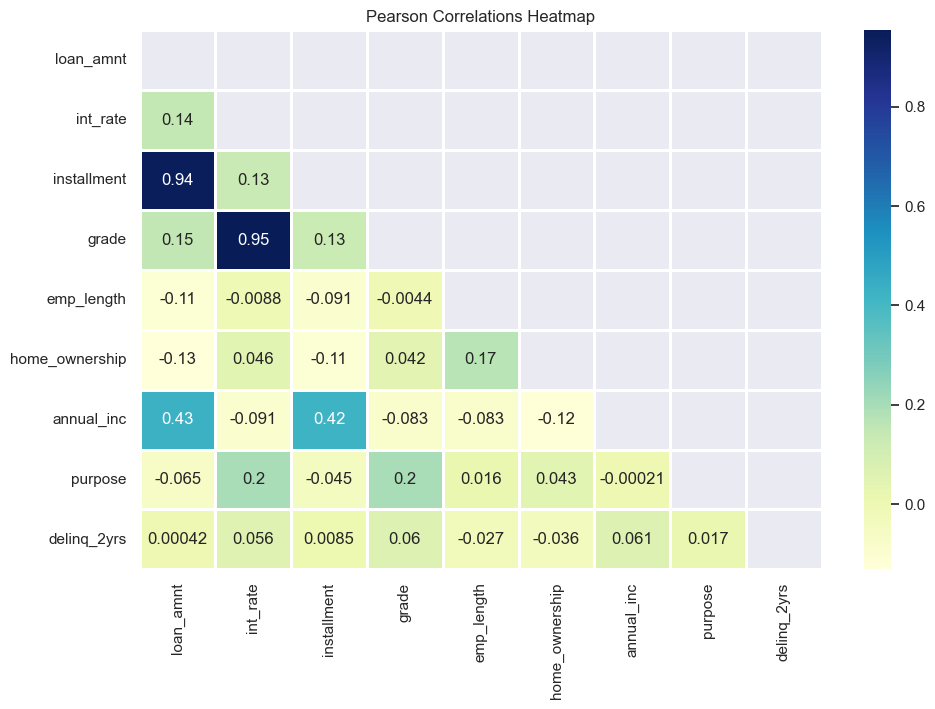

In [46]:
corr = df_new_normalized[['loan_amnt', 'int_rate', 'installment','grade', 'emp_length', 'home_ownership', 'annual_inc','purpose','delinq_2yrs']].corr()
sns.set(rc={'figure.figsize':(11,7)})
sns.heatmap(corr,linewidths=1, annot=True, cmap="YlGnBu", mask=np.triu(np.ones_like(corr, dtype=bool))).set_title("Pearson Correlations Heatmap");
plt.grid(False)

In [47]:
df_new_normalized['label'].value_counts(normalize = True)

label
0    0.923312
1    0.076688
Name: proportion, dtype: float64

In [48]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [49]:
import tensorflow as tf
# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

In [98]:
# Feature matrix X and target vector y
X = df_new_normalized.drop('label', axis=1)
y = df_new_normalized['label']

In [100]:
# Focal Loss function (Optional)
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        y_true = tf.cast(y_true, tf.float32)
        
        alpha_t = y_true * alpha + (tf.ones_like(y_true) - y_true) * (1 - alpha)
        p_t = y_true * y_pred + (tf.ones_like(y_true) - y_true) * (tf.ones_like(y_true) - y_pred)
        fl = - alpha_t * tf.keras.backend.pow((tf.ones_like(y_true) - p_t), gamma) * tf.keras.backend.log(p_t)
        return tf.keras.backend.mean(fl)
    return focal_loss_fixed

##We are defining weighted cross entropy as our loss function in order to give more weightage to the minority class which is class 1

In [105]:
def weighted_cross_entropy(y_true, y_pred):
  """Weighted cross-entropy loss function.

  Args:
    y_true: True labels.
    y_pred: Predicted probabilities.

  Returns:
    Weighted cross-entropy loss.
  """

  # Calculate class weights (adjust as needed)
  class_weight = {0: 1.0, 1: 5.0}  # Higher weight for class 1 (minority class)

  # Apply class weights to the cross-entropy loss
  weighted_ce = tf.nn.weighted_cross_entropy_with_logits(labels=y_true, logits=y_pred, pos_weight=class_weight[1])
  return tf.reduce_mean(weighted_ce)

In [107]:
import numpy as np

n_samples = 200000 + 62000
n_classes = 2

class_weights = {0: n_samples / (n_classes * np.bincount([0] * 200000 + [1] * 62000))}

print(class_weights)


{0: array([0.655     , 2.11290323])}


In [111]:
from tensorflow.keras import layers, models
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle
from tensorflow.keras.losses import binary_crossentropy

# List to store metrics for each run
accuracy_list = []
precision_list = []
recall_list = []
auc_list = []
F1_score_list = []

# Create the model (simple architecture for example)
def create_model(input_dim):
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_dim=input_dim))
    model.add(layers.Dropout(0.25)) 
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.25)) 
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.003)
    model.compile(optimizer=optimizer, 
                  loss= weighted_cross_entropy, 
                  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC(), tf.keras.metrics.F1Score()])
    return model

## We are taking random 200k out of nearly 800k records from class 0 and all 67k class 1 records to reduce the imbalance in each of the four splits¶
The model weights from previous split training are preserved and it goes on improving till 2nd or 3rd split but then the yield stops
We can see we are getting upto 72-73% recall on 1 class, i.e. 70 percent of the loan defaulters are classified correctly this is good achievement


--- Training on split 1 ---
Epoch 1/14
6755/6755 ━━━━━━━━━━━━━━━━━━━━ 101s 14ms/step - accuracy: 0.3609 - auc: 0.5722 - f1_score: 0.3991 - loss: 1.3179 - precision: 0.2607 - recall: 0.8520 - val_accuracy: 0.5340 - val_auc: 0.6722 - val_f1_score: 0.3992 - val_loss: 1.3005 - val_precision: 0.3189 - val_recall: 0.7646
Epoch 2/14
6755/6755 ━━━━━━━━━━━━━━━━━━━━ 93s 14ms/step - accuracy: 0.5480 - auc: 0.6418 - f1_score: 0.3990 - loss: 1.2974 - precision: 0.3181 - recall: 0.7101 - val_accuracy: 0.5855 - val_auc: 0.6773 - val_f1_score: 0.3992 - val_loss: 1.2693 - val_precision: 0.3417 - val_recall: 0.7150
Epoch 3/14
6755/6755 ━━━━━━━━━━━━━━━━━━━━ 99s 15ms/step - accuracy: 0.6000 - auc: 0.6609 - f1_score: 0.3981 - loss: 1.2698 - precision: 0.3403 - recall: 0.6499 - val_accuracy: 0.5944 - val_auc: 0.6804 - val_f1_score: 0.3992 - val_loss: 1.2536 - val_precision: 0.3447 - val_recall: 0.6952
Epoch 4/14
6755/6755 ━━━━━━━━━━━━━━━━━━━━ 93s 14ms/step - accuracy: 0.6039 - auc: 0.6670 - f1_score: 0.399

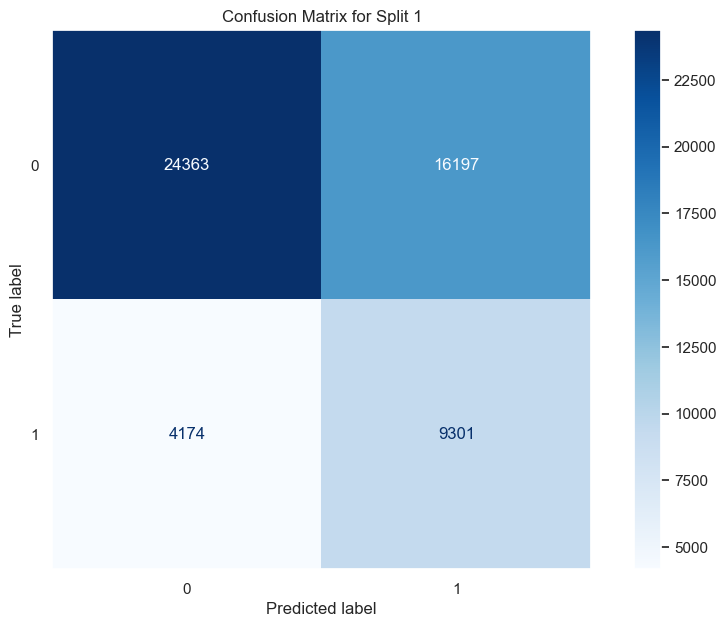


--- Training on split 2 ---
Epoch 1/14
6755/6755 ━━━━━━━━━━━━━━━━━━━━ 102s 15ms/step - accuracy: 0.6160 - auc: 0.6901 - f1_score: 0.3998 - loss: 1.2406 - precision: 0.3600 - recall: 0.6904 - val_accuracy: 0.6316 - val_auc: 0.7000 - val_f1_score: 0.3992 - val_loss: 1.2343 - val_precision: 0.3700 - val_recall: 0.6787
Epoch 2/14
6755/6755 ━━━━━━━━━━━━━━━━━━━━ 104s 15ms/step - accuracy: 0.6171 - auc: 0.6908 - f1_score: 0.3989 - loss: 1.2397 - precision: 0.3600 - recall: 0.6899 - val_accuracy: 0.6133 - val_auc: 0.7005 - val_f1_score: 0.3992 - val_loss: 1.2338 - val_precision: 0.3613 - val_recall: 0.7168
Epoch 3/14
6755/6755 ━━━━━━━━━━━━━━━━━━━━ 91s 14ms/step - accuracy: 0.6195 - auc: 0.6934 - f1_score: 0.3979 - loss: 1.2371 - precision: 0.3607 - recall: 0.6884 - val_accuracy: 0.6164 - val_auc: 0.7017 - val_f1_score: 0.3992 - val_loss: 1.2330 - val_precision: 0.3631 - val_recall: 0.7138
Epoch 4/14
6755/6755 ━━━━━━━━━━━━━━━━━━━━ 90s 13ms/step - accuracy: 0.6188 - auc: 0.6935 - f1_score: 0.40

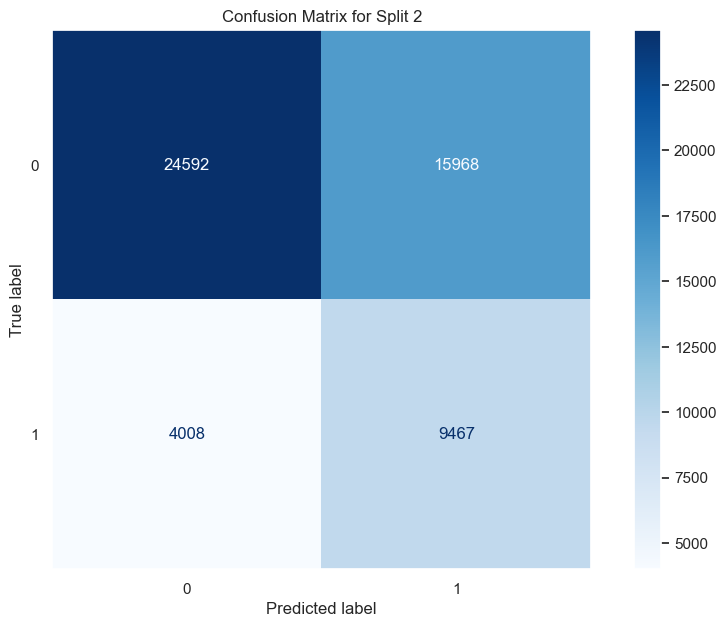


--- Training on split 3 ---
Epoch 1/14
6755/6755 ━━━━━━━━━━━━━━━━━━━━ 91s 14ms/step - accuracy: 0.6268 - auc: 0.7019 - f1_score: 0.4004 - loss: 1.2330 - precision: 0.3700 - recall: 0.6986 - val_accuracy: 0.6307 - val_auc: 0.7141 - val_f1_score: 0.3992 - val_loss: 1.2251 - val_precision: 0.3736 - val_recall: 0.7106
Epoch 2/14
6755/6755 ━━━━━━━━━━━━━━━━━━━━ 95s 14ms/step - accuracy: 0.6274 - auc: 0.7013 - f1_score: 0.3988 - loss: 1.2316 - precision: 0.3689 - recall: 0.6980 - val_accuracy: 0.6267 - val_auc: 0.7141 - val_f1_score: 0.3992 - val_loss: 1.2253 - val_precision: 0.3719 - val_recall: 0.7210
Epoch 3/14
6755/6755 ━━━━━━━━━━━━━━━━━━━━ 93s 14ms/step - accuracy: 0.6298 - auc: 0.7047 - f1_score: 0.3998 - loss: 1.2295 - precision: 0.3724 - recall: 0.7029 - val_accuracy: 0.6296 - val_auc: 0.7146 - val_f1_score: 0.3992 - val_loss: 1.2249 - val_precision: 0.3731 - val_recall: 0.7138
Epoch 4/14
6755/6755 ━━━━━━━━━━━━━━━━━━━━ 93s 14ms/step - accuracy: 0.6232 - auc: 0.7008 - f1_score: 0.3997


KeyboardInterrupt



In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Loop over the splits
num_splits = 4
model = create_model(X.shape[1])

for i in range(num_splits):
    print(f"\n--- Training on split {i+1} ---")
    
    # Undersample the majority class (label 0) to 1/4th of its size
    rus = RandomUnderSampler(sampling_strategy={0: int(len(df_new_normalized[df_new_normalized['label'] == 0]) / 4), 1: len(df_new_normalized[df_new_normalized['label'] == 1])}, random_state=i)
    X_res, y_res = rus.fit_resample(X, y)
    
    # Shuffle the dataset to ensure randomness
    X_res, y_res = shuffle(X_res, y_res, random_state=i)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify = y_res)
    
    X_train = X_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    
    # train the model
    
    history = model.fit(X_train, y_train, epochs=14, batch_size=32, validation_data=(X_test, y_test), verbose=1)
    
    # Evaluate the model
    scores = model.evaluate(X_test, y_test, verbose=1)
    
    # Print and store metrics
    print(f"Split {i+1} - Accuracy: {scores[1]:.4f}, Precision: {scores[2]:.4f}, Recall: {scores[3]:.4f}, AUC: {scores[4]:.4f},F1_score: {scores[5]:.4f}")
    
    accuracy_list.append(scores[1])
    precision_list.append(scores[2])
    recall_list.append(scores[3])
    auc_list.append(scores[4])
    F1_score_list.append(scores[5])
    
    # Generate predictions and confusion matrix
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob >= 0.5).astype(int)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for Split {i+1}')
    plt.grid(False)
    plt.show()

# Print average metrics
print(f"\nAverage Accuracy: {np.mean(accuracy_list):.4f}")
print(f"Average Precision: {np.mean(precision_list):.4f}")
print(f"Average Recall: {np.mean(recall_list):.4f}")
print(f"Average AUC: {np.mean(auc_list):.4f}")
print(f"Average F1_score: {np.mean(F1_score_list):.4f}")

27456/27456 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step


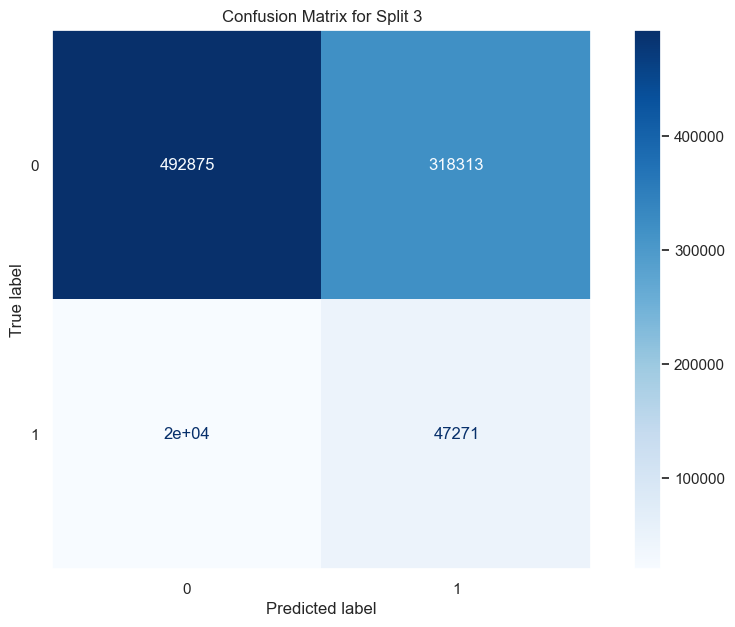

In [116]:
# Generate predictions and confusion matrix
y_pred_prob = model.predict(X)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for Split {i+1}')
plt.grid(False)
plt.show()